In [10]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request
import requests

In [122]:
url = "https://pokemondb.net/pokedex/all"
safeAdd = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(safeAdd)
data = bs(html, 'html.parser')

In [123]:
table = data.find("table", {"id":"pokedex"})
rows = table.findAll("tr")

row_data = []
for row in rows:
    cell_data = []
    if row.contents[1].get_text() == "501":
        break
    else:
        for item in row.findAll("td"):
            cell_data.append(item.get_text())
        row_data.append(cell_data)

In [124]:
import pandas as pd
df = pd.DataFrame(row_data, columns = ['No', ' Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def',
                                       'Speed'])
df = df.drop(df.index[0])
df
#df.to_csv("dhea1323_pokedex.csv", index=False)

,No,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
1,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
2,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
3,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
4,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
5,004,Charmander,Fire,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
594,496,Servine,Grass,413,60,60,75,60,75,83
595,497,Serperior,Grass,528,75,75,95,75,95,113
596,498,Tepig,Fire,308,65,63,45,45,45,45
597,499,Pignite,Fire Fighting,418,90,93,55,70,55,55


In [200]:
import numpy as np
dff = pd.read_csv("dhea1323_pokedex.csv")
dff['Attack'] = pd.to_numeric(dff['Attack'])
dff['Defense'] = pd.to_numeric(dff['Defense'])

dff['Alog'] = np.log(dff['Attack'])
dff['Dlog'] = np.log(dff['Defense'])

log_df = dff.iloc[:, 10:12]
log_array = np.array(log_df)

In [209]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

kmeans = KMeans(n_clusters=2, random_state=31)
kmeans.fit(log_array)
dff['Kluster'] = kmeans.labels_
label = kmeans.predict(log_array)
silhouette_score(log_array, label)
#dff.to_csv("dhea1323_pokedex_kmeans.csv")

0.4518451011238457

C:\Users\Windows\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Defense')

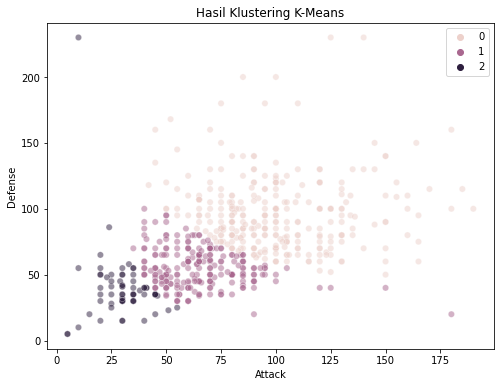

In [208]:
import seaborn as sns

plt.figure(figsize=[8,6])
sns.scatterplot(dff.Attack, dff.Defense, s=40, c=dff.Kluster, marker="o", alpha=0.5, hue=label)
plt.title('Hasil Klustering K-Means')
plt.xlabel("Attack")
plt.ylabel("Defense")

## Mencari K yang Terbaik

Text(0, 0.5, 'Sum of Squared Error')

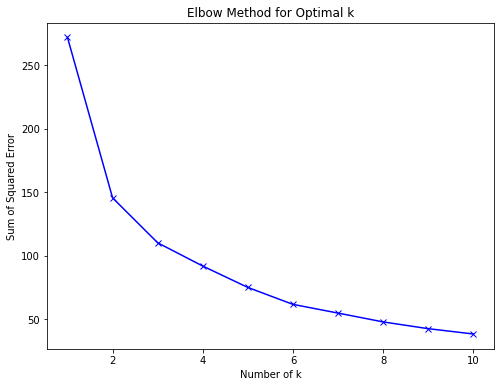

In [204]:
#Elbow Method
sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(log_array)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(log_array)
    nilai_sse = 0
    
    for i in range(len(log_array)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += (log_array[i, 0] - titik_pusat[0]) ** 2 + (log_array[i, 1] - titik_pusat[1]) ** 2
    
    sse.append(nilai_sse)
    k_list.append(k)
plt.figure(figsize=[8,6])    
plt.plot(k_list,sse, 'bx-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of k')
plt.ylabel('Sum of Squared Error')

Text(0, 0.5, 'Silhouette Score')

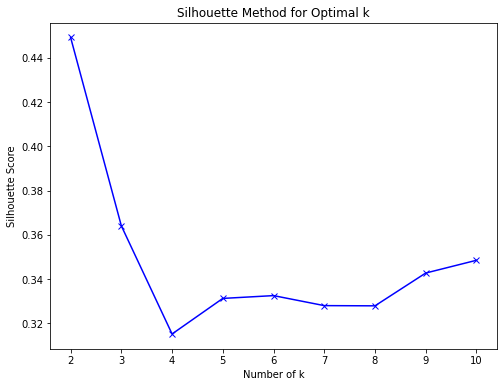

In [210]:
from sklearn.metrics import silhouette_score

data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(log_array)
    labels = kmeans.labels_
    data.append(silhouette_score(log_array, labels, metric = 'euclidean'))
    k_list.append(k)
    
plt.figure(figsize=[8,6])    
plt.plot(k_list,data, 'bx-')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of k')
plt.ylabel('Silhouette Score')

<AxesSubplot:>

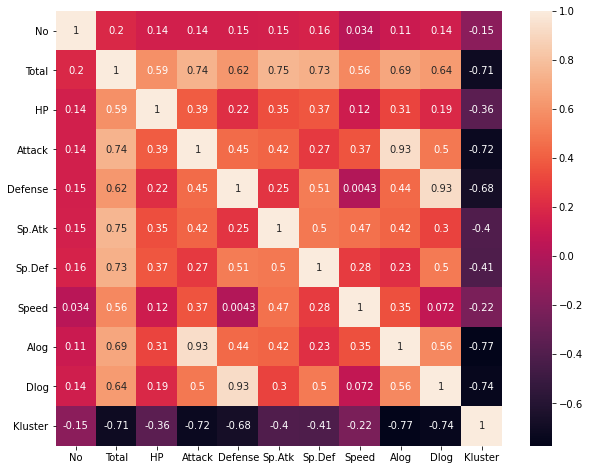

In [185]:
plt.figure(figsize=[10,8])
sns.heatmap(dff.corr(), annot=True)